In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
##import dataset
data = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/8_PCA/wine.csv")


In [3]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
##checkong for duplicate values
data[data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [6]:
dataset=data.drop(['Type'],axis=1)

In [8]:
## feature scaling
ss=StandardScaler()
dataset_scale=ss.fit_transform(dataset)

In [9]:
## applying PCA
pca=PCA()
pca_values=pca.fit_transform(dataset_scale)
var=np.cumsum(pca.explained_variance_ratio_)
var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

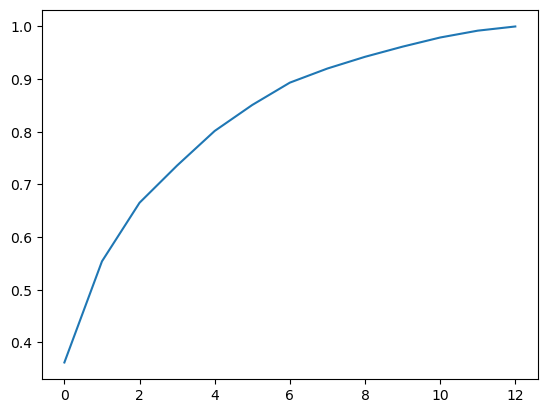

In [10]:
plt.plot(var)

<AxesSubplot:>

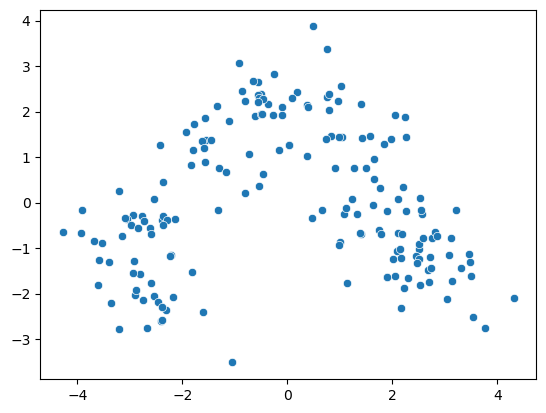

In [11]:
x = pca_values[:,0]
y = pca_values[:,1]
z = pca_values[:,2]
sns.scatterplot(x,y)

<AxesSubplot:>

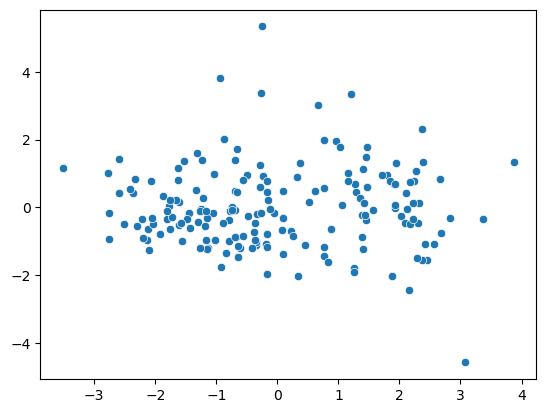

In [12]:
sns.scatterplot(y,z)

<AxesSubplot:>

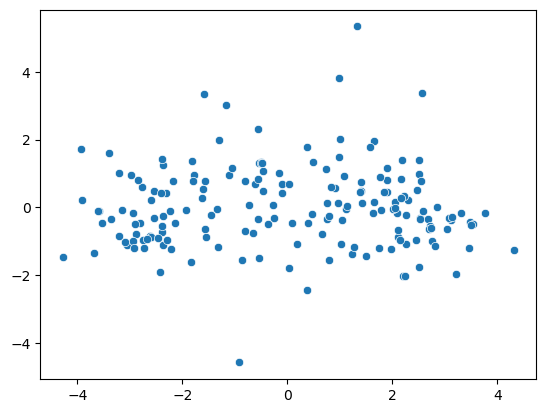

In [13]:
sns.scatterplot(x,z)

<function matplotlib.pyplot.show(close=None, block=None)>

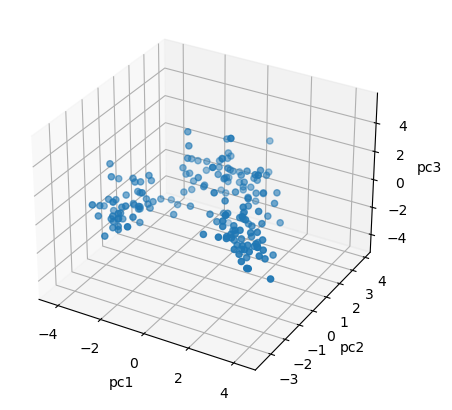

In [14]:
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z)
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')
plt.show

In [15]:
#taking first three components
pca_values[:,:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [16]:
dataset_pca=pd.DataFrame(pca_values[0:,:3],columns=['pc1','pc2','pc3'])
dataset_pca.head()

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


## Hierarchial clustering

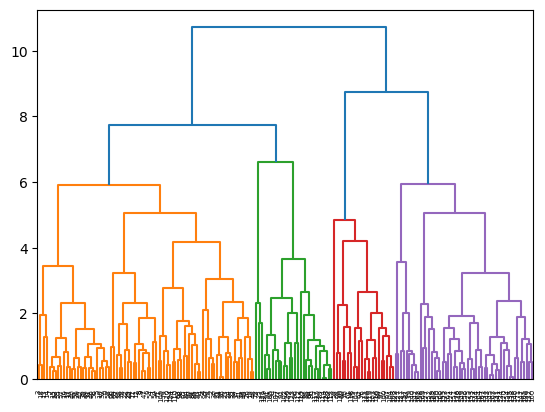

In [17]:
## dendrogram

dendrogram = sch.dendrogram(sch.linkage(dataset_pca, method='complete'))

In [18]:
## for 3 clusters 
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(dataset_pca)
data['cluster_id_hc3']=pd.Series(a)
data.cluster_id_hc3.value_counts()

0    106
1     50
2     22
Name: cluster_id_hc, dtype: int64

In [19]:
data.groupby('cluster_id_hc3').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster_id_hc,,,,,,,,,,,,,,
0,1.443396,13.065000,1.993396,2.406509,18.758491,101.990566,2.632075,2.663019,0.319151,1.858491,4.438585,1.063302,3.038113,853.707547
1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636


In [36]:
## for 4 clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(dataset_pca)
data['cluster_id_hc4']=pd.Series(a)
data.cluster_id_hc4.value_counts()

3    59
2    48
0    37
1    34
Name: cluster_id_hc4, dtype: int64

In [37]:
data.groupby('cluster_id_hc4').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id_hc,cluster_id_kmeans
cluster_id_hc4,,,,,,,,,,,,,,,,
0,1.972973,12.198378,2.128649,2.481351,22.400000,94.216216,2.239459,2.195946,0.402703,1.650811,2.960811,1.035946,2.873784,505.054054,1.243243,1.081081
1,2.029412,12.377647,1.661176,2.017353,17.929412,94.882353,2.279706,1.957647,0.313824,1.547941,3.231765,1.075176,2.684706,535.470588,0.000000,0.941176
2,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,2.000000,0.000000
3,1.016949,13.734915,2.001695,2.438305,16.935593,106.983051,2.837966,2.975424,0.287458,1.922373,5.511695,1.062542,3.148136,1117.525424,3.000000,2.000000


In [38]:
## for 5 clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(dataset_pca)
data['cluster_id_hc5']=pd.Series(a)
data.cluster_id_hc5.value_counts()

3    59
2    48
0    34
1    34
4     3
Name: cluster_id_hc5, dtype: int64

In [39]:
data.groupby('cluster_id_hc5').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id_hc,cluster_id_kmeans,cluster_id_hc4
cluster_id_hc5,,,,,,,,,,,,,,,,,
0,2.029412,12.377647,1.661176,2.017353,17.929412,94.882353,2.279706,1.957647,0.313824,1.547941,3.231765,1.075176,2.684706,535.470588,0.0,0.941176,1.0
1,2.000000,12.168824,2.146765,2.434118,21.920588,91.294118,2.169118,2.076471,0.404412,1.627353,2.841765,1.028235,2.821765,482.558824,1.0,1.000000,0.0
2,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,2.0,0.000000,2.0
3,1.016949,13.734915,2.001695,2.438305,16.935593,106.983051,2.837966,2.975424,0.287458,1.922373,5.511695,1.062542,3.148136,1117.525424,3.0,2.000000,3.0
4,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000,4.0,2.000000,0.0


[1095.30020125986, 599.6299738009429, 493.5407056508025, 424.383214591087, 367.64325642075966, 330.70947682558494, 293.61559815365746, 266.8515332107526, 242.15478391261414]


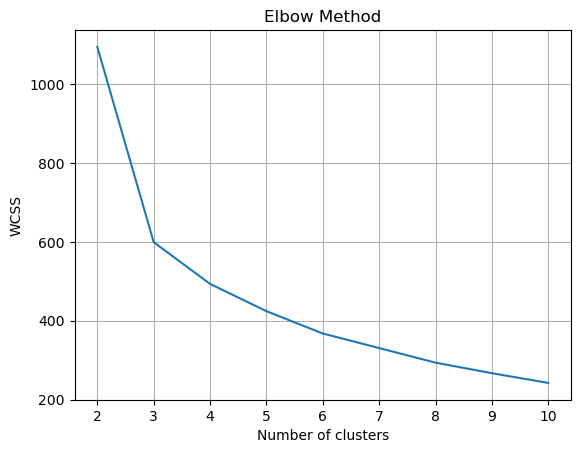

In [40]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(dataset_pca)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

In [41]:
## At 3 clusters the steepness of the graph decreases
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(dataset_pca)

KMeans(n_clusters=3, random_state=0)

In [42]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [43]:
data['cluster_id_kmeans']=pd.Series(kmeans.labels_)
data.cluster_id_kmeans.value_counts()

2    67
1    62
0    49
Name: cluster_id_kmeans, dtype: int64

In [44]:
data.groupby('cluster_id_kmeans').mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id_hc,cluster_id_hc4,cluster_id_hc5
cluster_id_kmeans,,,,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,1.959184,1.979592,1.959184
1,1.048387,13.689839,1.982097,2.448065,17.301613,107.467742,2.853065,2.981774,0.288387,1.923387,5.429355,1.067258,3.148548,1103.370968,2.983871,2.870968,2.983871
2,2.000000,12.252388,1.926866,2.241194,20.102985,93.119403,2.230000,2.048358,0.364776,1.596119,3.043284,1.054418,2.788806,504.298507,0.567164,0.477612,0.567164


In [45]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [46]:
data.groupby('Type').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id_hc,cluster_id_kmeans,cluster_id_hc4,cluster_id_hc5
Type,,,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,3.016949,1.000000,2.949153,3.016949
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.661972,1.929577,0.535211,0.661972
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,1.958333,0.000000,1.979167,1.958333


### In the original data, the number of clusters was 3. With k means clustering, we got the ideal number of clusters to be 3. But with hierarchial clustering we got the ideal number of clusters to be 4


In [47]:
### Plotting clustered data
dataset_pca['cluster_id_hc']=data['cluster_id_hc4']
dataset_pca['cluster_id_kmeans']=data['cluster_id_kmeans']
dataset_pca['Type']=data['Type']

<function matplotlib.pyplot.show(close=None, block=None)>

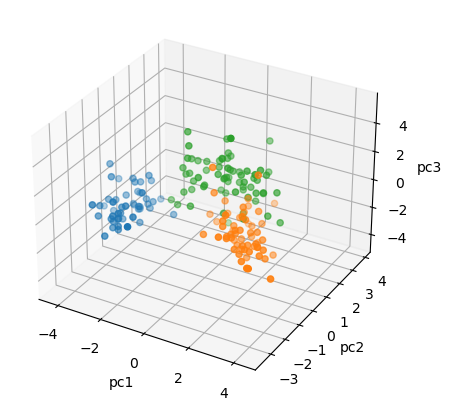

In [48]:
### k means clustering
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(dataset_pca[dataset_pca['cluster_id_kmeans']==0].pc1,dataset_pca[dataset_pca['cluster_id_kmeans']==0].pc2,dataset_pca[dataset_pca['cluster_id_kmeans']==0].pc3,'c1')
axes.scatter3D(dataset_pca[dataset_pca['cluster_id_kmeans']==1].pc1,dataset_pca[dataset_pca['cluster_id_kmeans']==1].pc2,dataset_pca[dataset_pca['cluster_id_kmeans']==1].pc3,'c2')
axes.scatter3D(dataset_pca[dataset_pca['cluster_id_kmeans']==2].pc1,dataset_pca[dataset_pca['cluster_id_kmeans']==2].pc2,dataset_pca[dataset_pca['cluster_id_kmeans']==2].pc3,'c3')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

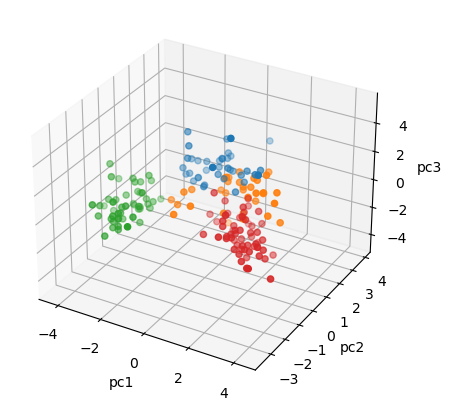

In [49]:
### hierarchical clustering
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(dataset_pca[dataset_pca['cluster_id_hc']==0].pc1,dataset_pca[dataset_pca['cluster_id_hc']==0].pc2,dataset_pca[dataset_pca['cluster_id_hc']==0].pc3,'c1')
axes.scatter3D(dataset_pca[dataset_pca['cluster_id_hc']==1].pc1,dataset_pca[dataset_pca['cluster_id_hc']==1].pc2,dataset_pca[dataset_pca['cluster_id_hc']==1].pc3,'c2')
axes.scatter3D(dataset_pca[dataset_pca['cluster_id_hc']==2].pc1,dataset_pca[dataset_pca['cluster_id_hc']==2].pc2,dataset_pca[dataset_pca['cluster_id_hc']==2].pc3,'c3')
axes.scatter3D(dataset_pca[dataset_pca['cluster_id_hc']==3].pc1,dataset_pca[dataset_pca['cluster_id_hc']==3].pc2,dataset_pca[dataset_pca['cluster_id_hc']==3].pc3,'c4')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

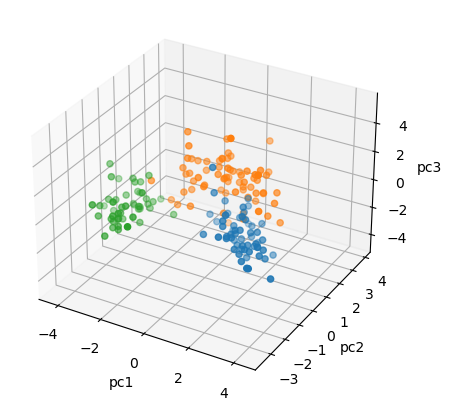

In [50]:
### the data is plotted with the given 'Type' column
plt.figure(figsize=(6,5))
axes = plt.axes(projection='3d')
axes.scatter3D(dataset_pca[dataset_pca['Type']==1].pc1,dataset_pca[dataset_pca['Type']==1].pc2,dataset_pca[dataset_pca['Type']==1].pc3,'c1')
axes.scatter3D(dataset_pca[dataset_pca['Type']==2].pc1,dataset_pca[dataset_pca['Type']==2].pc2,dataset_pca[dataset_pca['Type']==2].pc3,'c2')
axes.scatter3D(dataset_pca[dataset_pca['Type']==3].pc1,dataset_pca[dataset_pca['Type']==3].pc2,dataset_pca[dataset_pca['Type']==3].pc3,'c3')
axes.set_xlabel('pc1')
axes.set_ylabel('pc2')
axes.set_zlabel('pc3')

plt.show